# AirBnB data feature engineering

## Notebook set-up

Assume we are preparing this data for a linear regression model.

In [1]:
# PyPI imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor

# Internal imports
import gperdrizet_functions as funcs

label='price'

features=[
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood_group',
    'room_type'
]

## 1. Data loading

In [2]:
raw_data_df=pd.read_parquet('./data/processed/gperdrizet_cleaned_data.parquet')
raw_data_df.dropna(inplace=True)
datasets={'Raw': raw_data_df.copy()}
raw_data_df.head().transpose()

,0,1,2,3,4
price,149.00000,225.00000,150.00000,89.00000,80.00000
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.94190,-73.95976,-73.94399
minimum_nights,1.00000,1.00000,3.00000,1.00000,10.00000
number_of_reviews,9.00000,45.00000,0.00000,270.00000,9.00000
reviews_per_month,0.21000,0.38000,0.28200,4.64000,0.10000
calculated_host_listings_count,6.00000,2.00000,1.00000,1.00000,1.00000
availability_365,365.00000,355.00000,365.00000,194.00000,0.00000
neighbourhood_group,1.00000,2.00000,2.00000,1.00000,2.00000
room_type,1.00000,0.00000,1.00000,0.00000,0.00000


In [3]:
raw_data_df[features].describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
count,48140.000000,48140.00000,48140.000000,48140.000000,48140.000000,48140.000000,48140.000000,48140.000000,48140.000000
mean,40.728894,-73.95151,6.779269,23.596386,1.178374,3.551600,110.215372,1.670295,0.511612
std,0.054870,0.04617,20.493203,44.814217,1.543927,11.060121,130.574084,0.740421,0.545952
min,40.499790,-74.24442,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,40.689667,-73.98239,1.000000,1.000000,0.140000,1.000000,0.000000,1.000000,0.000000
50%,40.722955,-73.95517,2.000000,5.000000,0.536000,1.000000,41.000000,2.000000,0.000000
75%,40.763452,-73.93561,5.000000,24.000000,1.660000,2.000000,218.000000,2.000000,1.000000
max,40.913060,-73.71299,1250.000000,629.000000,20.940000,121.000000,365.000000,4.000000,2.000000


## 2. Scaling & transformation methods

### 2.1. Box-Cox transformation

In [4]:
skewed_features=[
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood_group',
    'room_type'
]

transformed_data_df=raw_data_df.copy()
transformed_data_df[skewed_features]=power_transform(transformed_data_df[skewed_features]+1, method='box-cox')
datasets['Transformed']=transformed_data_df[features + [label]].copy()

transformed_data_df[features + [label]].describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
count,48140.000000,48140.00000,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04
mean,40.728894,-73.95151,4.014699e-17,2.833905e-16,5.667811e-17,1.983734e-15,-7.557081e-17,-9.965901e-16,-1.570456e-16,6.683294e-16
std,0.054870,0.04617,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,40.499790,-74.24442,-1.287132e+00,-1.393016e+00,-1.377396e+00,-6.772181e-01,-1.179034e+00,-2.730887e+00,-9.670849e-01,-1.062910e+01
25%,40.689667,-73.98239,-1.287132e+00,-8.327881e-01,-9.591839e-01,-6.772181e-01,-1.179034e+00,-8.957676e-01,-9.670849e-01,-6.707598e-01
50%,40.722955,-73.95517,-3.195616e-01,-4.219680e-02,-1.189343e-01,-6.772181e-01,2.396748e-01,5.017780e-01,-9.670849e-01,-4.639173e-02
75%,40.763452,-73.93561,7.523276e-01,8.296038e-01,9.094522e-01,9.048966e-01,1.001597e+00,5.017780e-01,9.742271e-01,6.887227e-01
max,40.913060,-73.71299,2.166941e+00,2.294239e+00,2.163327e+00,2.020930e+00,1.257988e+00,2.703597e+00,1.831827e+00,4.156585e+00


### 2.2. Standard scaling

In [5]:
scaled_data_df=raw_data_df.copy()
scaler=StandardScaler()
scaled_data_df[features + [label]]=scaler.fit_transform(scaled_data_df[features + [label]])
datasets['Scaled']=scaled_data_df[features + [label]].copy()

scaled_data_df[features + [label]].describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
count,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,48140.000000,4.814000e+04,4.814000e+04,4.814000e+04
mean,-4.981770e-15,5.665685e-14,2.804386e-17,-1.889270e-17,-2.833905e-17,-3.188144e-17,0.000000,3.306223e-17,1.180794e-16,-7.557081e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,1.000010e+00,1.000010e+00
min,-4.175476e+00,-6.344251e+00,-2.820120e-01,-5.265434e-01,-7.567625e-01,-2.307051e-01,-0.844092,-2.255895e+00,-9.371095e-01,-7.230456e-01
25%,-7.149115e-01,-6.688417e-01,-2.820120e-01,-5.042288e-01,-6.725608e-01,-2.307051e-01,-0.844092,-9.052983e-01,-9.371095e-01,-3.905956e-01
50%,-1.082386e-01,-7.927320e-02,-2.332148e-01,-4.149705e-01,-4.160693e-01,-2.307051e-01,-0.530091,4.452986e-01,-9.371095e-01,-2.219615e-01
75%,6.298383e-01,3.443844e-01,-8.682329e-02,9.006487e-03,3.119518e-01,-1.402892e-01,0.825476,4.452986e-01,8.945707e-01,1.201247e-01
max,3.356472e+00,5.166197e+00,6.066566e+01,1.350933e+01,1.279972e+01,1.061920e+01,1.951285,3.146492e+00,2.726251e+00,2.336754e+01


### 2.3. Box-Cox transform + standard scaling

In [6]:
scaled_transformed_data_df=transformed_data_df.copy()
scaler=StandardScaler()
scaled_transformed_data_df[features + [label]]=scaler.fit_transform(scaled_transformed_data_df[features + [label]])
datasets['Transformed+scaled']=scaled_transformed_data_df[features + [label]].copy()

scaled_transformed_data_df[features + [label]].describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
count,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04,4.814000e+04
mean,-4.981770e-15,5.665685e-14,3.542382e-17,-3.778541e-17,5.667811e-17,1.133562e-16,-2.833905e-17,9.446351e-18,-8.265557e-18,-2.361588e-18
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-4.175476e+00,-6.344251e+00,-1.287132e+00,-1.393016e+00,-1.377396e+00,-6.772181e-01,-1.179034e+00,-2.730887e+00,-9.670849e-01,-1.062910e+01
25%,-7.149115e-01,-6.688417e-01,-1.287132e+00,-8.327881e-01,-9.591839e-01,-6.772181e-01,-1.179034e+00,-8.957676e-01,-9.670849e-01,-6.707598e-01
50%,-1.082386e-01,-7.927320e-02,-3.195616e-01,-4.219680e-02,-1.189343e-01,-6.772181e-01,2.396748e-01,5.017780e-01,-9.670849e-01,-4.639173e-02
75%,6.298383e-01,3.443844e-01,7.523276e-01,8.296038e-01,9.094522e-01,9.048966e-01,1.001597e+00,5.017780e-01,9.742271e-01,6.887227e-01
max,3.356472e+00,5.166197e+00,2.166941e+00,2.294239e+00,2.163327e+00,2.020930e+00,1.257988e+00,2.703597e+00,1.831827e+00,4.156585e+00


## 2.4. Results

### 2.4.1. Linear model

In [7]:
linear_results_df=funcs.test_features(LinearRegression(), datasets, label)

data=[list(x) for _, x in linear_results_df.groupby('Feature set')['Score']]
labels=[[x]*len(y) for x, y in linear_results_df.groupby('Feature set')['Score']]
results=kruskal(*data)
print(f'Kruskal-Wallis p-value: {results.pvalue:.3f}\n')

linear_result=pairwise_tukeyhsd(np.concatenate(data), np.concatenate(labels), alpha=0.05)

Kruskal-Wallis p-value: 0.000



### 2.4.2. Tree model

In [8]:
tree_results_df=funcs.test_features(HistGradientBoostingRegressor(random_state=315), datasets, label)

data=[list(x) for _, x in linear_results_df.groupby('Feature set')['Score']]
labels=[[x]*len(y) for x, y in linear_results_df.groupby('Feature set')['Score']]
results=kruskal(*data)
print(f'Kruskal-Wallis p-value: {results.pvalue:.3f}\n')

tree_result=pairwise_tukeyhsd(np.concatenate(data), np.concatenate(labels), alpha=0.05)

Kruskal-Wallis p-value: 0.000



### 2.4.2. Model comparison

Linear model:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2       meandiff p-adj  lower  upper  reject
-------------------------------------------------------------------
        Raw             Scaled      0.0   1.0 -0.0062 0.0062  False
        Raw        Transformed   0.3728   0.0  0.3666  0.379   True
        Raw Transformed+scaled   0.3728   0.0  0.3666  0.379   True
     Scaled        Transformed   0.3728   0.0  0.3666  0.379   True
     Scaled Transformed+scaled   0.3728   0.0  0.3666  0.379   True
Transformed Transformed+scaled     -0.0   1.0 -0.0062 0.0062  False
-------------------------------------------------------------------

Tree model:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2       meandiff p-adj  lower  upper  reject
-------------------------------------------------------------------
        Raw             Scaled      0.0   1.0 -0.0062 0.0062  False
        Raw        Tr

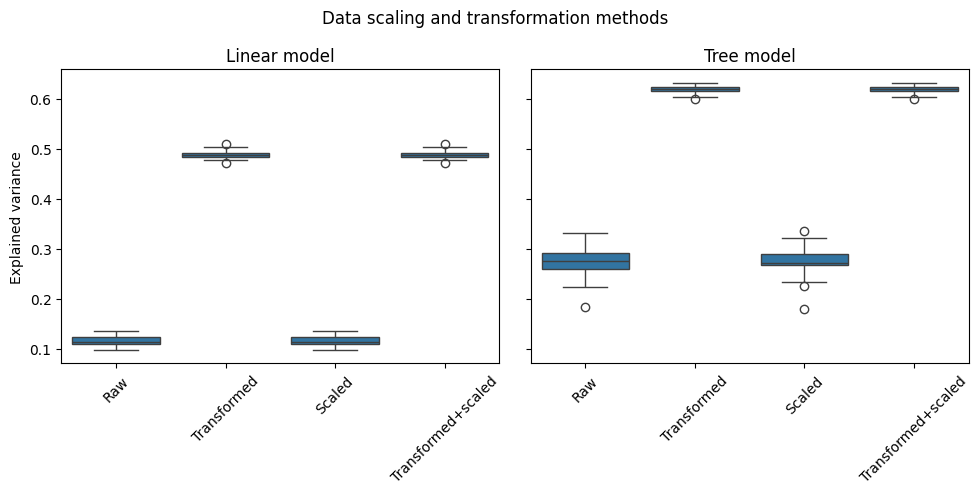

In [9]:
print(f'Linear model:\n{linear_result}\n')
print(f'Tree model:\n{tree_result}')

fig, axs=plt.subplots(1,2, figsize=(10,5), sharey=True)
axs=axs.flatten()

fig.suptitle('Data scaling and transformation methods')

sns.boxplot(linear_results_df, x='Feature set', y='Score', ax=axs[0])
axs[0].set_title('Linear model')
axs[0].set_xlabel('')
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_ylabel('Explained variance')

sns.boxplot(tree_results_df, x='Feature set', y='Score', ax=axs[1])
axs[1].set_title('Tree model')
axs[1].set_xlabel('')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_ylabel('Explained variance')

plt.tight_layout()
plt.show()